
# Project: A Deep Dive into the No Show Appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction 

> In this dataset, we'll be analyzing a little over 100k medical appointments in Brazil focusing on whether or not the patients showed up for their appointment. <br>

> There will be several factors to consider such as chronic diseases or conditions (alcoholism, diabetes, hypertension, and handicap), demographics (such as age and gender), and others. The goal is to determine whether or not these factors have a direct correlation with patients showing up or not showing up to their appointment. <br>

> **Note:**<br>
>- "ScheduledDay": is the day the patient set up their appointment<br>
>- "Neighbourhood": is the location of the hospital <br>
>- "Scholarship": indicates whether or not the patient is enrolled in a Brasilian Welfare program called Bolsa Familia <br>

>Now let's dive deep into the dataset and find out the answers to these questions.<br>


In [55]:
# importing all the necessary packages
# writing down the magical visualization line
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

>First, let's start by loading the no show file and wrangling the data for information that needs cleaning. 

### General Properties

In [56]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Right off the bat you can see there are a few spelling mistakes like hypertension and handicap.

> We should also pay attention to the term "no-show" since an affirmative yes in that column would actually mean the patient *didn't* get to the appointment. This could be adjusted later on to be less confusing.

>Also, we might want to change it to "no_show" later on just to follow better naming convention practices. 

>Let's take a further look at the data shape and description before we get into the cleaning part.



In [57]:
df.shape

(110527, 14)

In [58]:
# display the number of patients (represented as rows) and the number of characteristics or factors we're comparing (represented as columns)
df.shape


(110527, 14)

In [59]:
# looking at an overview of the df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> There doesn't appear to be any null or missing values in the data set, which is good. 

In [60]:
#Checking to see if there are any duplicates in the dataset
df.duplicated().any()

False

> There aren't any duplicates in our dataset which is a good thing. Now, let's look at the descriptive properties of the df.

In [61]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From the df, we can come up with a few insights like: 

> -The mean of age group is 37.<br>
> -There's obviously a mistake in one of the data inputs where the patient age was entered as -1, which is impossible.<br> 
> -The oldest person in the group is 115 years old.


### Data Cleaning

>Next step is cleaning the data and removing any unnecessary data that is irrelevant to the analysis. We can probably drop columns like Patient ID, Appointment ID, Scheduled day, and Appointment day because it's unlikely these will have much corrrelation to the show or no show status of the patient. 


In [62]:
# Let's drop the unnecessary columns

df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis = 1, inplace =True )
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [63]:
# Let's rename the "no-show" column for better naming convention practices
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [64]:
# Let's rename the no_show values like we mentioned earlier to make them less confusing
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'


In [65]:
# Let's correct the spelling of the word hypertension
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [66]:
# Let's also correct the spelling of the word handicap
df.rename(columns={'Handcap':'Handicap'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data has been cleaned, let's visualize the relationship between each factor and the patients' show or no show status. Let's first look at a visualization of all the data to get a general feel.  

### A General Look

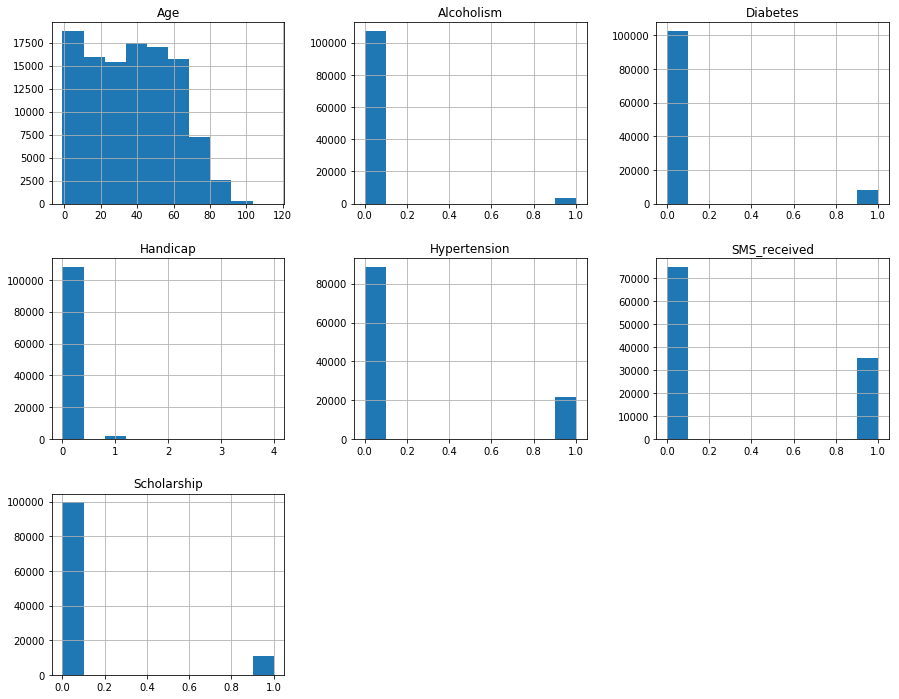

In [67]:
# Let's look at histograms for all factors in the df
df.hist(figsize=(15,12));


> From this overview, we can come up with a few conclusions. <br> <br>
-**Alcoholism:** The vast majority of people did not suffer from alcoholism. <br>
-**Diabetes:** Most people we not diabetic. <br>
-**Hypertension:** Approximately 21000 patients out of 110000 suffered from hypertension, which is around 19%. <br>
-**Scholarship:** Approximately 10000 patients out of 110000 were part of the welfare program (about 9%). <br>
-**Handicap:** Most people were not handicapped. <br>
<br>
-**SMS Received:** About a third of the patients received an SMS while two thirds did not. In other words, the number of patients who didn't receive an SMS are approximately double those who did. 

### How many people went to their appointments and how many did not? 

In [68]:
#counting the number of patients who made it to their appointment
df[show].count()


Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handicap         88208
SMS_received     88208
No_show          88208
dtype: int64

In [69]:
#counting the number of patients who didn't make it to their appointment
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handicap         22319
SMS_received     22319
No_show          22319
dtype: int64

> We can see that the number of people who went to their appointment are **4 times** more than those who did not. 

### Is there a correlation between gender and show/no show status? 

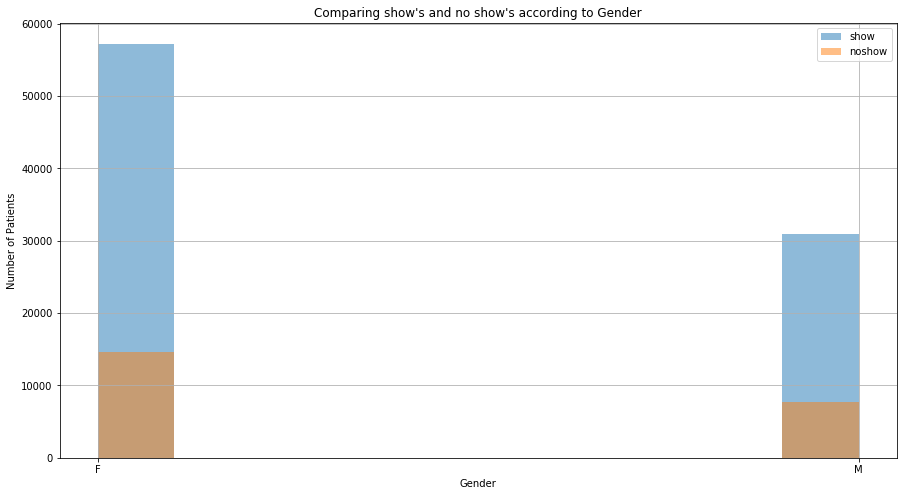

In [70]:
# Let's compare show and no show according to gender using a histogram
plt.figure(figsize=[15,8])
df.Gender[show].hist(alpha = 0.5, label = 'show')
df.Gender[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparing show\'s and no show\'s according to Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

In [71]:
#Let's take a look at the numbers as well
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


>According to the numbers and the histogram, about 25% of both genders were no show's (did not go to their appointment) and about 75% of both male and females did go to their appointments. <br>

>Also, females outnumbered males in both cases of shows and no shows. <br>

>Therefore, there is no obvious correlation between gender and show or no show's. <br>


### Is there a correlation between being enrolled in the welfare program and shows or no shows? 

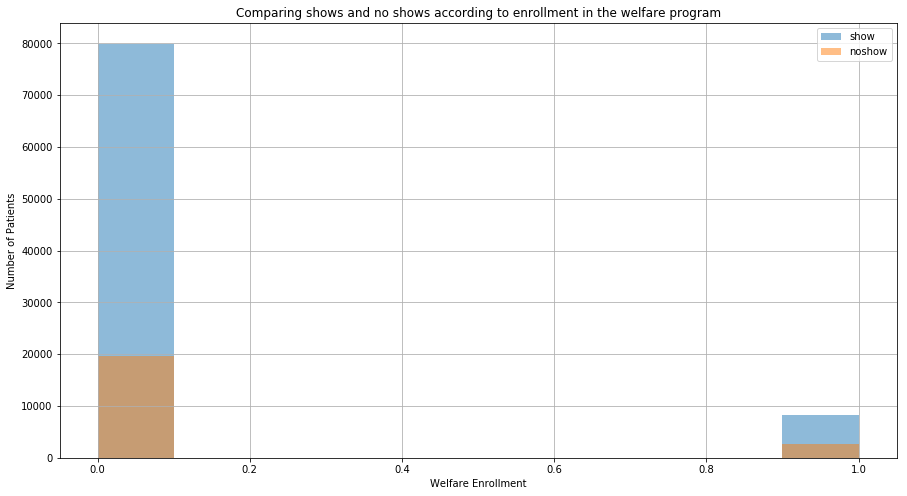

In [72]:
# Let's compare show and no show according to welfare status using a histogram
plt.figure(figsize=[15,8])
df.Scholarship[show].hist(alpha = 0.5, label = 'show')
df.Scholarship[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparing shows and no shows according to enrollment in the welfare program')
plt.xlabel('Welfare Enrollment')
plt.ylabel('Number of Patients');

In [73]:
#Let's take a look at the numbers as well
print(df.Scholarship[show].value_counts())
print(df.Scholarship[noshow].value_counts())

0    79925
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


> Approximately 10% of those who were enrolled in the welfare program **did not** show up to their appointment and around the same percentage of those without welfare **did not** show up either.

> Therefore, enrollment in the welfare program **does not appear to be a significant factor** and does not have much correlation with shows and no shows. 

### Is there a correlation between hypertension and shows or no shows? 

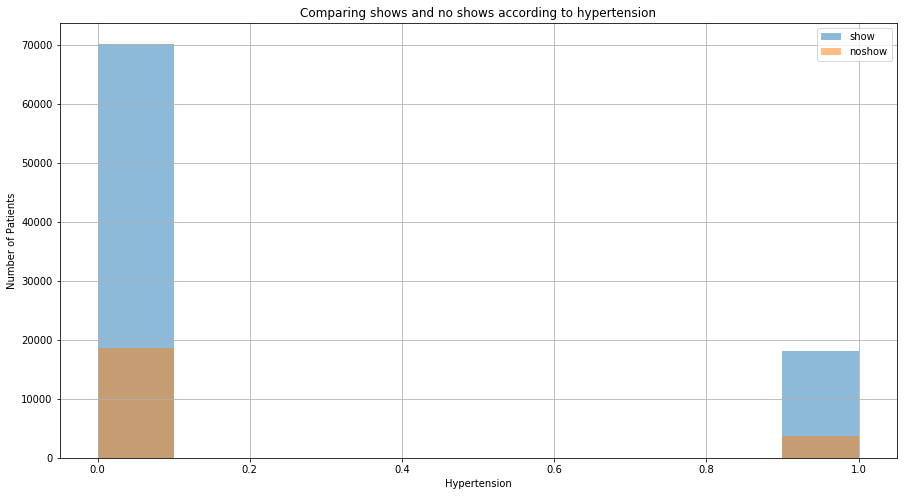

In [74]:
# Let's compare show and no show according to whether or not they have hypertension using a histogram
plt.figure(figsize=[15,8])
df.Hypertension[show].hist(alpha = 0.5, label = 'show')
df.Hypertension[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparing shows and no shows according to hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Number of Patients');

In [75]:
#Let's take a look at the numbers as well
print(df.Hypertension[show].value_counts())
print(df.Hypertension[noshow].value_counts())

0    70179
1    18029
Name: Hypertension, dtype: int64
0    18547
1     3772
Name: Hypertension, dtype: int64


> The ratio of shows to no shows for both hypertensive and non-hypertensive patients is approximately the same and therefore, hypertension appears to be an **insignificant** factor. 

### Is there a correlation between diabetes and shows or no shows? 

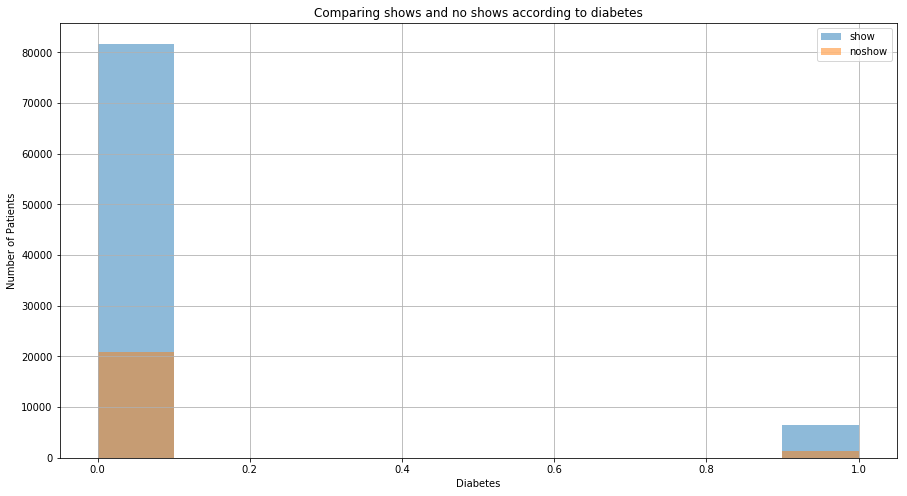

In [76]:
# Let's compare show and no show according to whether or not they have diabetes using a histogram
plt.figure(figsize=[15,8])
df.Diabetes[show].hist(alpha = 0.5, label = 'show')
df.Diabetes[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparing shows and no shows according to diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Number of Patients');

In [77]:
#Let's take a look at the numbers as well
print(df.Diabetes[show].value_counts())
print(df.Diabetes[noshow].value_counts())

0    81695
1     6513
Name: Diabetes, dtype: int64
0    20889
1     1430
Name: Diabetes, dtype: int64


> The ratio of shows to no shows for both diabetic and non-diabetic patients is approximately the same and therefore, diabetes appears to be an **insignificant** factor. 

### Is there a correlation between alcoholism and shows or no shows? 

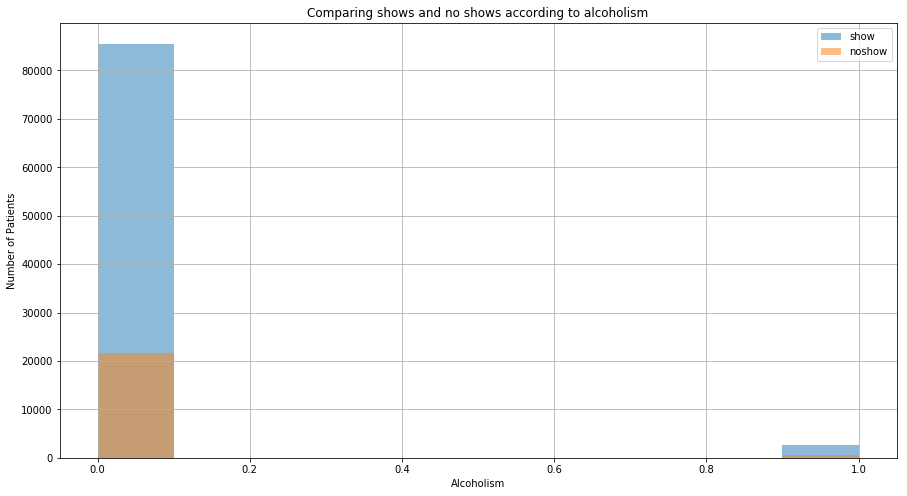

In [78]:
# Let's compare show and no show according to alcoholism using a histogram
plt.figure(figsize=[15,8])
df.Alcoholism[show].hist(alpha = 0.5, label = 'show')
df.Alcoholism[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparing shows and no shows according to alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Number of Patients');

In [79]:
#Let's take a look at the numbers as well
print(df.Alcoholism[show].value_counts())
print(df.Alcoholism[noshow].value_counts())

0    85525
1     2683
Name: Alcoholism, dtype: int64
0    21642
1      677
Name: Alcoholism, dtype: int64


> The ratio of shows to no shows for both alcoholics and non-alcoholics is approximately the same and therefore, alcoholism appears to be an **insignificant** factor. 

### Is there a correlation between being handicapped and shows or no shows? 

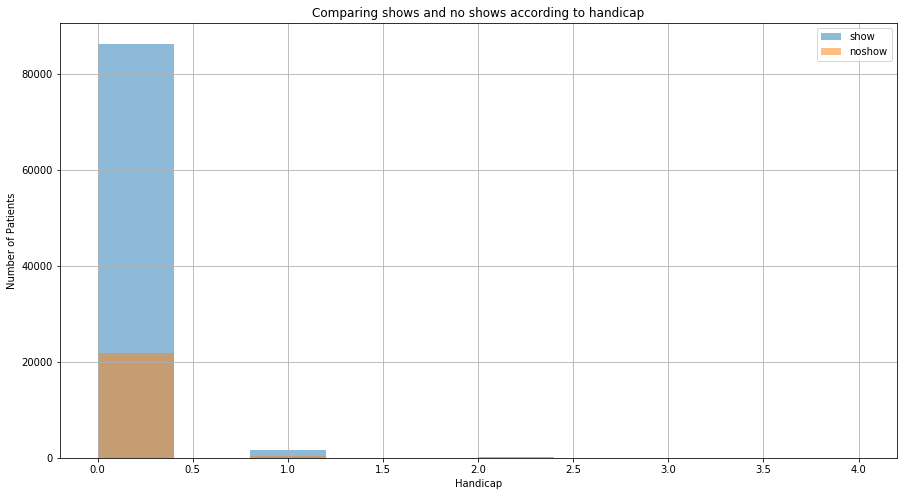

In [80]:
# Let's compare show and no show according to handicap using a histogram
plt.figure(figsize=[15,8])
df.Handicap[show].hist(alpha = 0.5, label = 'show')
df.Handicap[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparing shows and no shows according to handicap')
plt.xlabel('Handicap')
plt.ylabel('Number of Patients');

> There appears to be no obvious correlation between being handicapped and showing up or not showing up to the appointment so it's an **insignificant** factor.

### Is there a correlation between receiving an SMS and shows or no shows? 

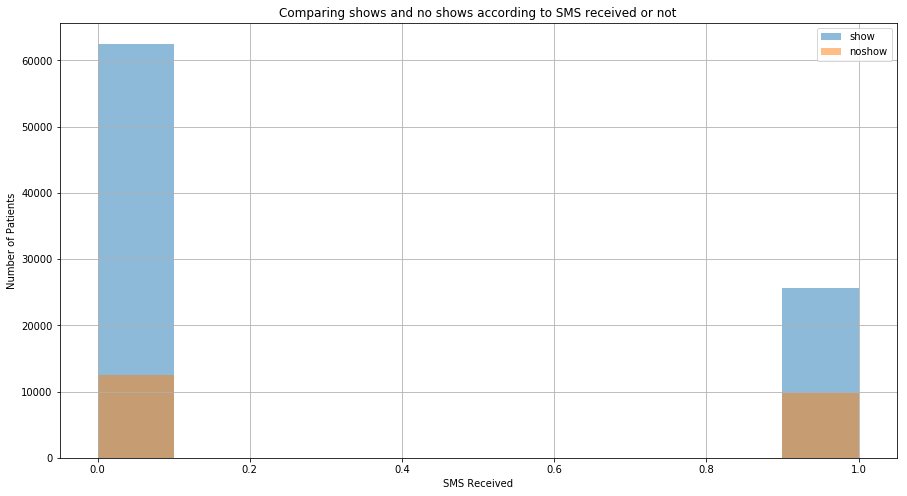

In [81]:
# Let's compare show and no show according to handicap using a histogram
plt.figure(figsize=[15,8])
df.SMS_received[show].hist(alpha = 0.5, label = 'show')
df.SMS_received[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparing shows and no shows according to SMS received or not')
plt.xlabel('SMS Received')
plt.ylabel('Number of Patients');

In [82]:
#Let's take a look at the numbers as well
print(df.SMS_received[show].value_counts())
print(df.SMS_received[noshow].value_counts())

0    62510
1    25698
Name: SMS_received, dtype: int64
0    12535
1     9784
Name: SMS_received, dtype: int64


> Surprisingly, out of all the people who showed up to their appointment, the ones who ***didn't*** receive an SMS were much more than the ones who did! <br>

> About 56% of those who received an SMS showed up to their appointment while about 70% of those who didn't receive an SMS showed up.  

### Is there a correlation between patient age and shows or no shows? 

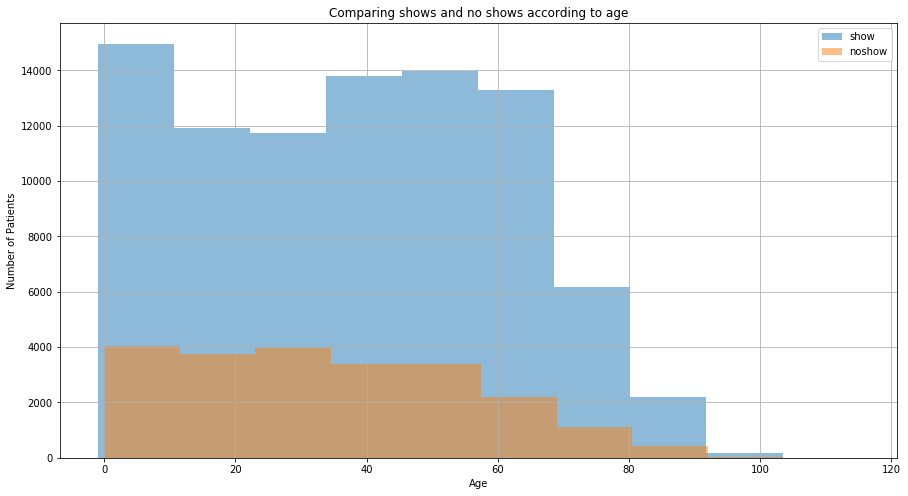

In [83]:
# Let's compare show and no show according to handicap using a histogram
plt.figure(figsize=[15,8])
df.Age[show].hist(alpha = 0.5, label = 'show')
df.Age[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend()
plt.title('Comparing shows and no shows according to age')
plt.xlabel('Age')
plt.ylabel('Number of Patients');

> People of ages 10 years and younger were the most to show up followed by the age group of 35-70. <br>
> It's noticeable that as the age increases and the patients get older, the less they show up to the appointment.  

### Is there a correlation between neighbourhood and shows or no shows? 

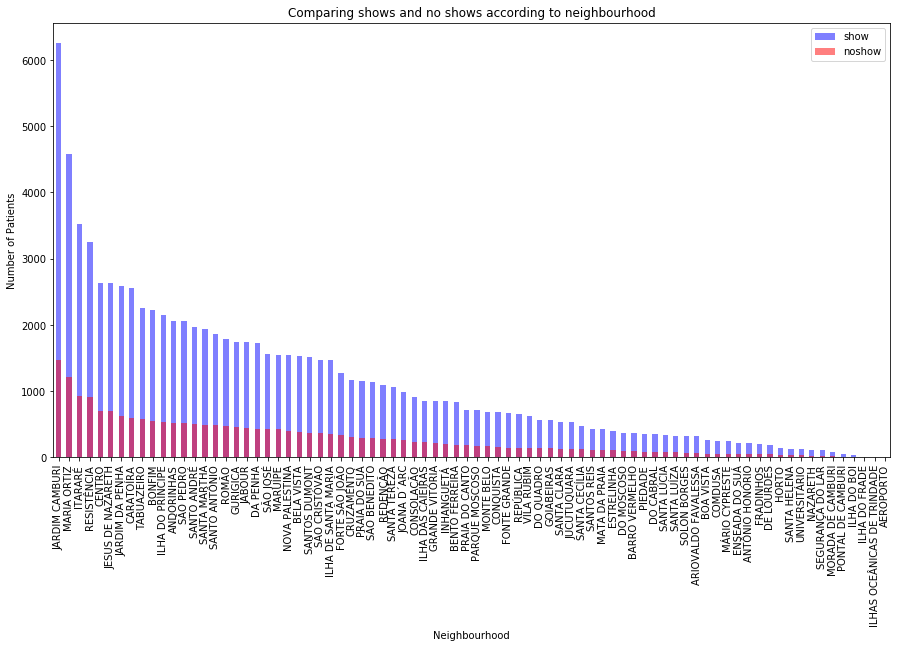

In [84]:
# Let's compare show and no show according to neighbourhood using a histogram
plt.figure(figsize=[15,8])
df.Neighbourhood[show].value_counts().plot (kind = 'bar', alpha = 0.5, color= 'blue', label = 'show')
df.Neighbourhood[noshow].value_counts().plot (kind = 'bar', alpha = 0.5, color= 'red', label = 'noshow')

plt.legend()
plt.title('Comparing shows and no shows according to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients');

> One of the neighbourhoods, Jardim Camburi, appears to have the highest number of shows.<br>

>It appears that the neighbourhood could have a strong effect on whether or not the patient shows up to their appointment. 

<a id='conclusions'></a>
## Conclusions

> To sum up all of this: <br>

> **Neighbourhood:** Seems to be strongly correlated to patients showing up for their appointment.<br>
> **Age:** Certain age groups seemed to show up more than others such as those below 10 years old and those between ages 35 and 70.<br>
>**SMS_received:** While it may not be directly correlated, it was surprising to learn that more people showed up without receiving an SMS reminder. 

> **Limitations:**<br>
>We couldn't find a direct correlation between shows/no shows and the other factors like gender, diabetes, hypertension, handicap, welfare, and alcoholism.
<br>


In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0